In [320]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import cv2 as cv
import matplotlib.image as mpimg
import numpy as np
import random as rnd
import functools as ft
from sklearn.cluster import KMeans as kmeans

%matplotlib inline

In [321]:
def bfs(cls, image, i, j):
    result = [(i,j)]
    queue = [(i,j)]
    image[i][j] = cls
    while len(queue) != 0:
        cur = queue[0]
        queue = queue[1:]
        if image[cur[0]-1][cur[1]] == 255:
            result.append((cur[0]-1, cur[1]))
            queue.append((cur[0]-1, cur[1]))
            image[cur[0]-1][cur[1]] = cls
        if image[cur[0]][cur[1]-1] == 255:
            result.append((cur[0], cur[1]-1))
            queue.append((cur[0], cur[1]-1))
            image[cur[0]][cur[1]-1] = cls
        if image[cur[0]+1][cur[1]] == 255:
            result.append((cur[0]+1, cur[1]))
            queue.append((cur[0]+1, cur[1]))
            image[cur[0]+1][cur[1]] = cls
        if image[cur[0]][cur[1]+1] == 255:
            result.append((cur[0], cur[1]+1))
            queue.append((cur[0], cur[1]+1))
            image[cur[0]][cur[1]+1] = cls
    return result

In [322]:
image = mpimg.imread("source.jpg")

Text(0.5,1,'Гистограмма яркости')

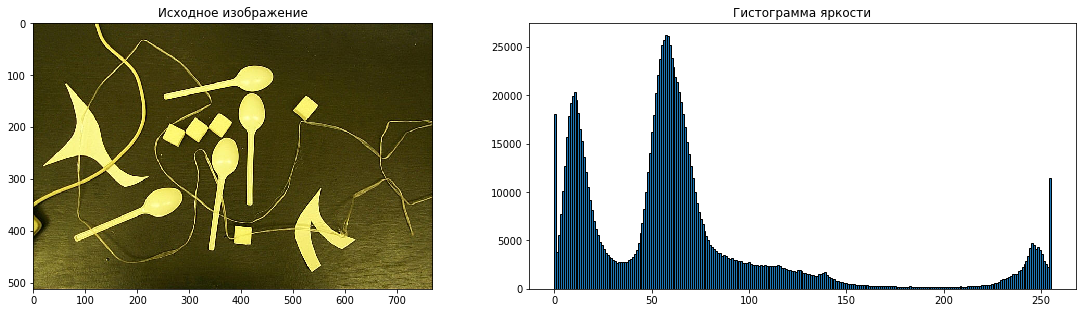

In [323]:
plt.figure(1, figsize=(20,10))
plt.subplot2grid((8, 8), (0, 0), rowspan=4, colspan=4)
plt.imshow(image)
plt.title("Исходное изображение")
plt.subplot2grid((8,8),(0,4), rowspan=4, colspan=4)
plt.hist(image.ravel(), bins=256, edgecolor="black")
plt.title("Гистограмма яркости")

In [324]:
cv_img = cv.imread("source.jpg", 0)
cv_img = cv.medianBlur(cv_img, 5)


r, th_img_1 = cv.threshold(cv_img, 127, 255, cv.THRESH_BINARY)
th_img_2 = cv.adaptiveThreshold(cv_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th_img_3 = cv.adaptiveThreshold(cv_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

Text(0.5,1,"'Закрытие' после 'Открытия'")

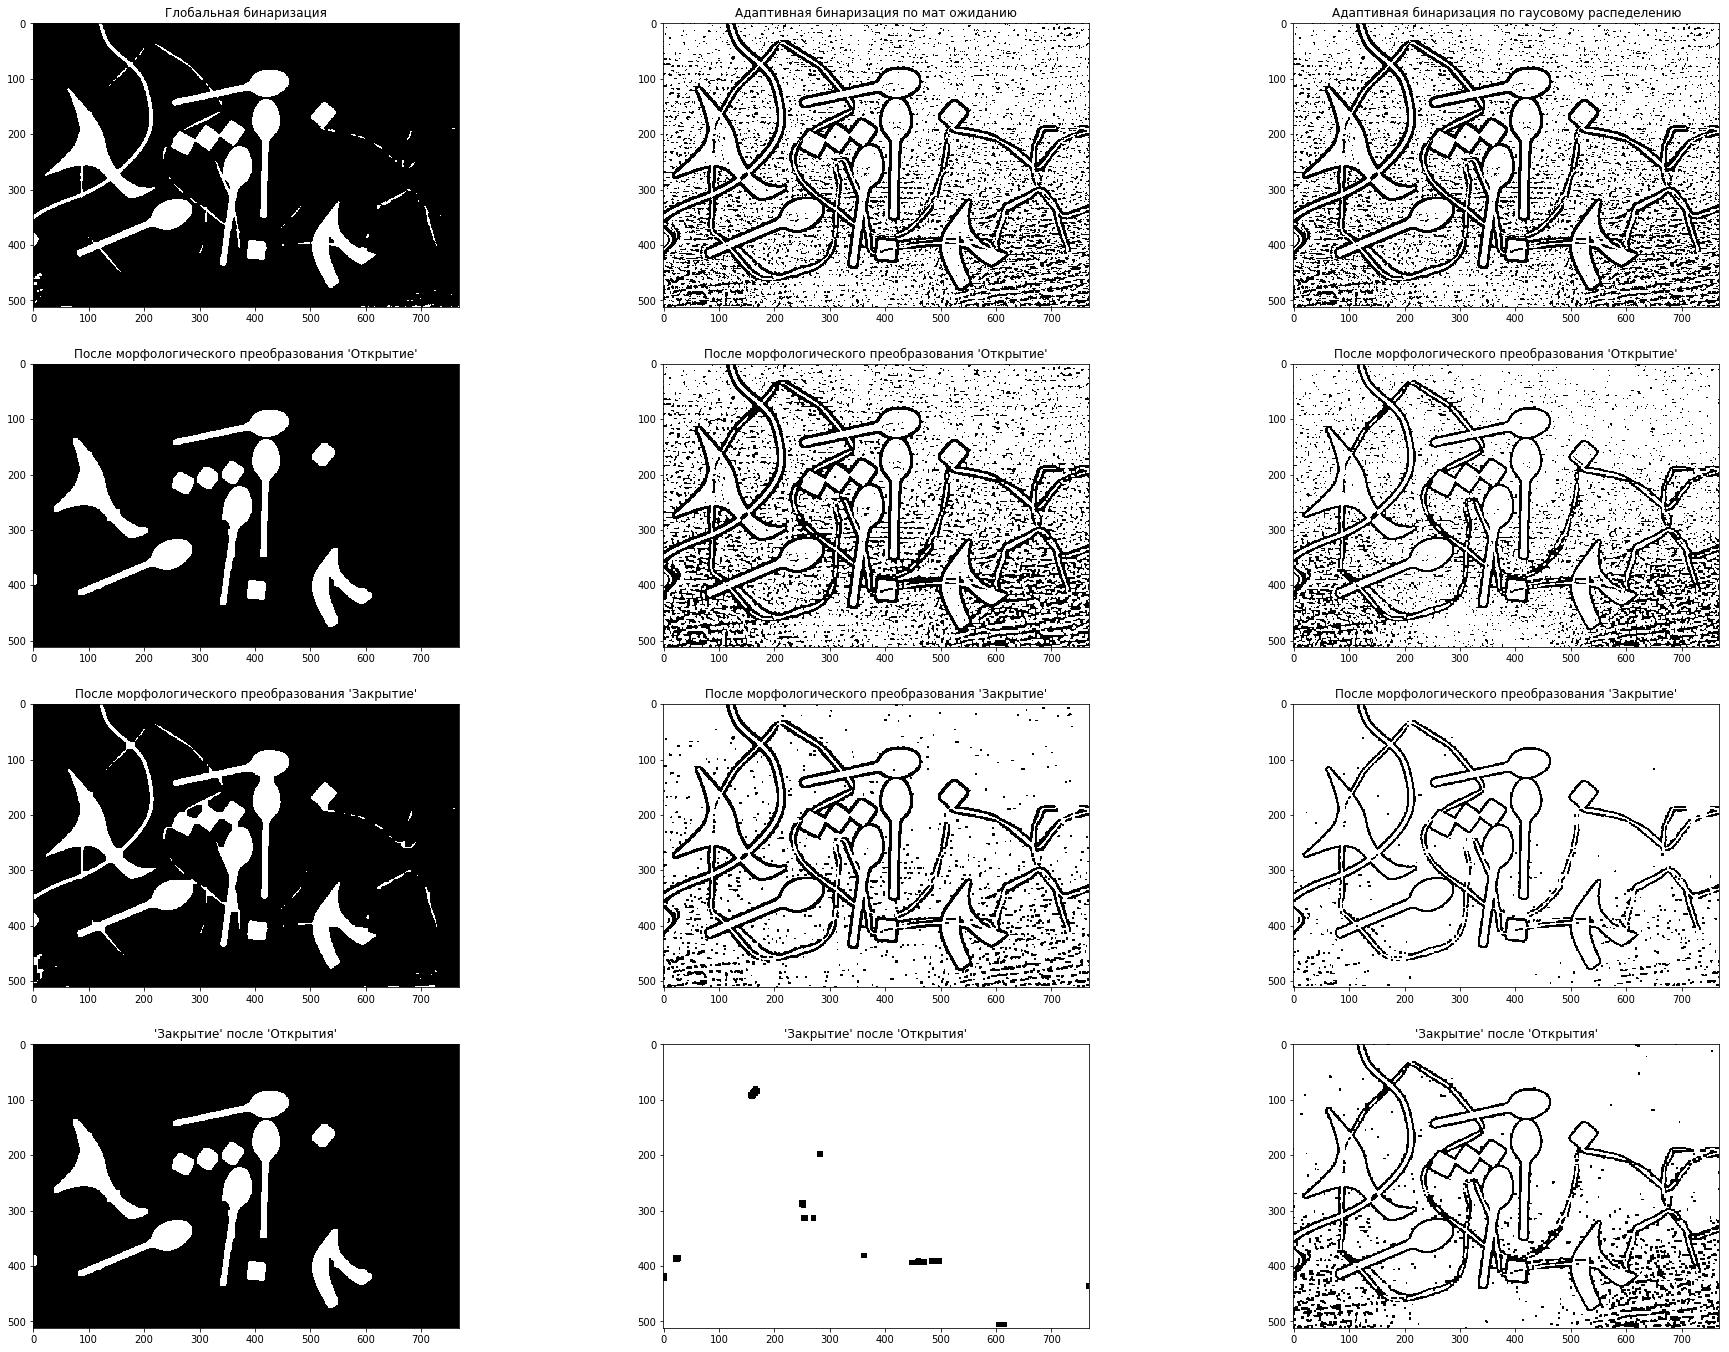

In [331]:
plt.figure(2, figsize=(32, 24))

plt.subplot2grid((4,3),(0,0))
plt.imshow(th_img_1, "gray")
plt.title("Глобальная бинаризация")

plt.subplot2grid((4,3),(0,1))
plt.imshow(th_img_2, "gray")
plt.title("Адаптивная бинаризация по мат ожиданию")

plt.subplot2grid((4,3),(0,2))
plt.imshow(th_img_2, "gray")
plt.title("Адаптивная бинаризация по гаусовому распеделению")


kernel_1 = np.ones((9,9),np.uint8)
opened_th_img_1 = cv.morphologyEx(th_img_1, cv.MORPH_OPEN, kernel_1)
plt.subplot2grid((4,3),(1,0))
plt.imshow(opened_th_img_1, "gray")
plt.title("После морфологического преобразования 'Открытие'")

kernel_2 = np.ones((3,3),np.uint8)
opened_th_img_2 = cv.morphologyEx(th_img_2, cv.MORPH_OPEN, kernel_2)
plt.subplot2grid((4,3),(1,1))
plt.imshow(opened_th_img_2, "gray")
plt.title("После морфологического преобразования 'Открытие'")

kernel_3 = np.ones((3,3),np.uint8)
opened_th_img_3 = cv.morphologyEx(th_img_3, cv.MORPH_OPEN, kernel_3)
plt.subplot2grid((4,3),(1,2))
plt.imshow(opened_th_img_3, "gray")
plt.title("После морфологического преобразования 'Открытие'")

kernel_2_1 = np.ones((10,10),np.uint8)
closed_th_img_1 = cv.morphologyEx(th_img_1, cv.MORPH_CLOSE, kernel_2_1)
plt.subplot2grid((4,3),(2,0))
plt.imshow(closed_th_img_1, "gray")
plt.title("После морфологического преобразования 'Закрытие'")

kernel_2_2 = np.ones((3,3),np.uint8)
closed_th_img_2 = cv.morphologyEx(th_img_2, cv.MORPH_CLOSE, kernel_2_2)
plt.subplot2grid((4,3),(2,1))
plt.imshow(closed_th_img_2, "gray")
plt.title("После морфологического преобразования 'Закрытие'")

kernel_2_3 = np.ones((3,3),np.uint8)
closed_th_img_3 = cv.morphologyEx(th_img_3, cv.MORPH_CLOSE, kernel_2_3)
plt.subplot2grid((4,3),(2,2))
plt.imshow(closed_th_img_3, "gray")
plt.title("После морфологического преобразования 'Закрытие'")

kernel_3_1 = np.ones((3, 3), np.uint8)
open_closed_th_img_1 = cv.morphologyEx(opened_th_img_1, cv.MORPH_CLOSE, kernel_3_1)
plt.subplot2grid((4,3),(3,0))
plt.imshow(open_closed_th_img_1, "gray")
plt.title("'Закрытие' после 'Открытия'")

kernel_3_2 = np.ones((10, 10), np.uint8)
open_closed_th_img_2 = cv.morphologyEx(opened_th_img_2, cv.MORPH_CLOSE, kernel_3_2)
plt.subplot2grid((4,3),(3,1))
plt.imshow(open_closed_th_img_2, "gray")
plt.title("'Закрытие' после 'Открытия'")

kernel_3_3 = np.ones((3, 3), np.uint8)
open_closed_th_img_3 = cv.morphologyEx(opened_th_img_3, cv.MORPH_CLOSE, kernel_3_3)
plt.subplot2grid((4,3),(3,2))
plt.imshow(open_closed_th_img_3, "gray")
plt.title("'Закрытие' после 'Открытия'")

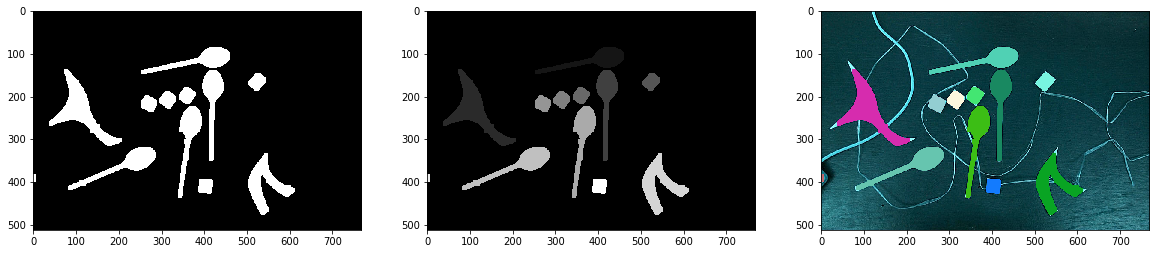

In [335]:
best = opened_th_img_1.copy()

plt.figure(3, figsize=(20,10))
plt.subplot(111)
plt.plot('Выделение связных областей')

plt.subplot(231)
plt.imshow(best, 'gray')

components = []
cls = 10
for i in range(0, len(best)):
    for j in range(0, len(best[0])):
        if best[i][j] == 255:
            components.append(bfs(cls, best, i, j))
            cls += 10

plt.subplot(232)
plt.imshow(best, 'gray')

cv_img_full = cv.imread("source.jpg")

rnd.seed(None)

for component in components:
    red, green, blue = rnd.randint(0, 255), rnd.randint(0, 255), rnd.randint(0, 255)
    for i, j in component:
        cv_img_full[i, j] = np.array([red, green, blue], dtype=np.uint8)

plt.subplot(233)        
plt.imshow(cv_img_full)

In [337]:
def area(component):
    return len(component)


def massCentre(component):
    ar = area(component)
    x_c = ft.reduce(lambda s,pxl: s+pxl[0], component, 0) / ar
    y_c = ft.reduce(lambda s,pxl: s+pxl[1], component, 0) / ar
    return x_c, y_c


def neighbors_count(component, p):
    sc = set(component)
    return ((p[0]-1, p[1]) in sc)+((p[0]+1, p[1]) in sc)\
            +((p[0], p[1]-1) in sc)+((p[0], p[1]+1) in sc)
    

def perimeter(component):
    return len(list(filter(lambda p: neighbors_count(component, p), component)))


def density(perim, ar):
    return perim**2 / ar


def discrete_central_moment(component, x_c, y_c, i, j):
    return ft.reduce(lambda s,p: s+(p[0]-x_c)**i*(p[1]-y_c)**j, component, 0)
dcm = discrete_central_moment


def elongation(comp, x_c, y_c):
    m20 = dcm(comp, x_c, y_c, 2, 0)
    m02 = dcm(comp, x_c, y_c, 0, 2)
    m11 = dcm(comp, x_c, y_c, 1, 1)
    return (m20+m02+((m20-m02)**2+4*m11**2)**0.5) / (m20+m02-((m20-m02)**2+4*m11**2)**0.5)

In [338]:
points = []

for component in components:
    c_area = area(component)
    c_cntr = massCentre(component)
    c_prmr = perimeter(component)
    c_dnst = density(c_prmr, c_area)
    c_lngt = elongation(component, c_cntr[0], c_cntr[1])
    points.append([c_area, c_prmr, c_dnst, c_lngt])

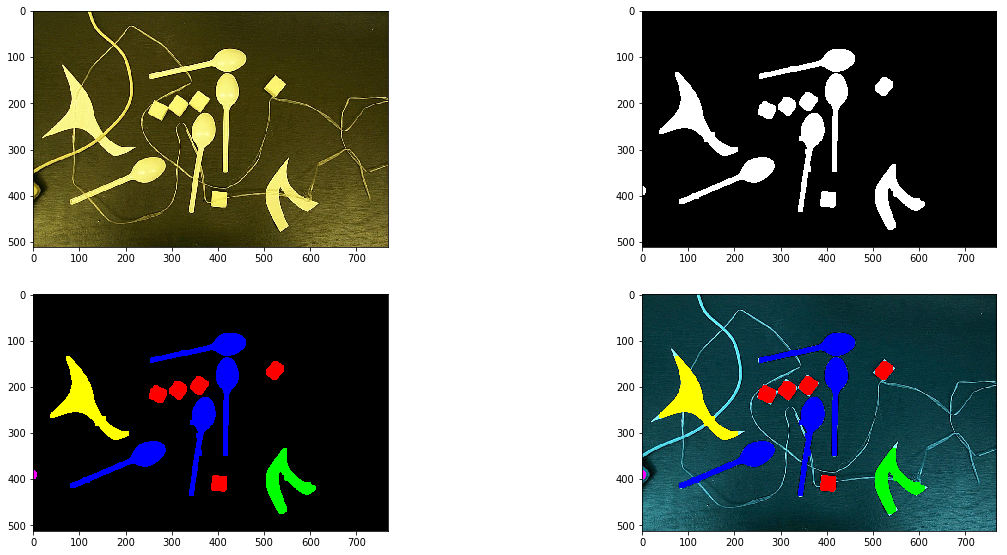

In [339]:
clusters = kmeans(n_clusters=5, random_state=0).fit(np.asarray(points))
cv_dark_img = cv_img_full.copy()

for i in range(0, len(cv_dark_img)):
    for j in range(0, len(cv_dark_img[0])):
        cv_dark_img[i,j][0] = cv_dark_img[i,j][1] = cv_dark_img[i,j][2] = 0

colors = [[255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255]]

for k in range(0, len(clusters.labels_)):
    component = components[k]
    for i, j in component:
        cv_img_full[i, j] = np.array(colors[clusters.labels_[k]], dtype=np.int8)
        cv_dark_img[i, j] = np.array(colors[clusters.labels_[k]], dtype=np.int8)
        
plt.figure(5, figsize=(20, 20))

plt.subplot(421)
plt.imshow(image)

plt.subplot(422)
plt.imshow(open_closed_th_img_1, 'gray')

plt.subplot(423)
plt.imshow(cv_dark_img)

plt.subplot(424)
plt.imshow(cv_img_full)
